In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [3]:
import time
import datetime
s = "2019-01-02"
time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
df["datetime"] = df["date"].apply(lambda s: datetime.datetime.strptime(s, "%Y-%m-%d"))

In [4]:
path = os.path.join("output", "dow", "download", "*2019-01-02_2020-09-30.csv")
stocks=glob.glob(path)

stock_list= []
for file in stocks:
    head, tail = os.path.split(file)
    stock_name=tail.split("_") [0]
    stock_list.append(stock_name)
    #print(stock_name)

series= []
for stock in stock_list:
    path= os.path.join(f"output", "dow", "download", f"{stock}_2019-01-02_2020-09-30.csv")
    df = pd.read_csv(path, encoding="UTF8")
    def rename(col):
        if col.startswith("Unnamed: "):
            return "date"
        else:
            return col
    df.columns = [rename(col) for col in df.columns]
    df["datetime"] = df["date"].apply(lambda s: datetime.datetime.strptime(s, "%Y-%m-%d"))
    series.append(df)
   


In [5]:
for stock in series:
    value = stock.loc[stock["date"]=="2020-03-02"].open.values[0]

    stock["values"] = stock["open"].apply(lambda s: s/value)
    

In [6]:
for stock in series:
    stock["values"]=(stock["open"]-stock["open"].min())/(stock["open"].max()-stock["open"].min())

In [7]:
temp_df=series[0]
temp_df.head()

,date,open,high,low,close,adjclose,volume,ticker,datetime,values
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.629097,148158800,AAPL,2019-01-02,0.026847
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.781353,365248800,AAPL,2019-01-03,0.000000
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,36.266144,234428400,AAPL,2019-01-04,0.001353
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,36.185429,219111200,AAPL,2019-01-07,0.011615
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.875229,164101200,AAPL,2019-01-08,0.013731


In [8]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

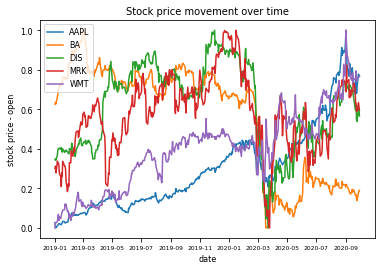

In [171]:
top5=["AAPL","BA","DIS","MRK","WMT"]
for index in range(len(series)):
    if series[index]["ticker"].values[0] in top5:
        plt.plot("datetime", "values", label = stock_list[index], data = series[index])
plt.xlabel('date')
plt.ylabel('stock price - open')
plt.title('Stock price movement over time')
plt.legend()
plt.show()



In [36]:
file_path = os.path.join("temp","dow","dow_final.csv")
dow_df = pd.read_csv(file_path)
dow_df["datetime"] = dow_df["date"].apply(lambda s: datetime.datetime.strptime(s, "%Y-%m-%d"))

In [39]:
dow_df.head()

,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,category,fiveYearAverageReturn,regularMarketPrice,logo_url,fax,address2,datetime
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.629097,148158800,AAPL,95014,Technology,...,NaN,0.0052,79684337,NaN,NaN,116.2,https://logo.clearbit.com/apple.com,NaN,NaN,2019-01-02
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.781353,365248800,AAPL,95014,Technology,...,NaN,0.0052,79684337,NaN,NaN,116.2,https://logo.clearbit.com/apple.com,NaN,NaN,2019-01-03
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,36.266144,234428400,AAPL,95014,Technology,...,NaN,0.0052,79684337,NaN,NaN,116.2,https://logo.clearbit.com/apple.com,NaN,NaN,2019-01-04
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,36.185429,219111200,AAPL,95014,Technology,...,NaN,0.0052,79684337,NaN,NaN,116.2,https://logo.clearbit.com/apple.com,NaN,NaN,2019-01-07
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.875229,164101200,AAPL,95014,Technology,...,NaN,0.0052,79684337,NaN,NaN,116.2,https://logo.clearbit.com/apple.com,NaN,NaN,2019-01-08


In [ ]:
_df_grouped = (_df.groupby('run_on_hw')['run_time_ms', 'run_memory_mb', 'run_inference_time_ms', 'run_preprocess_time_ms'].agg({'run_time_ms': 'mean', 'run_memory_mb': 'mean', 'run_inference_time_ms':"mean", "run_preprocess_time_ms":"mean"})[:100].reset_index()



In [110]:
df_technology = dow_df.loc[dow_df["sector"] == "Technology"]
df_technology.head()

df_healthcare = dow_df.loc[dow_df["sector"] == "Healthcare"]

df_industrials = dow_df.loc[dow_df["sector"] == "Industrials"]

In [65]:
df_groupby = df_technology.groupby("datetime")["open_x"].agg({"open_x": "sum"})[:100].reset_index()


SpecificationError: nested renamer is not supported

In [115]:
df_tech_groupby = df_technology.groupby(by="datetime").mean("open_x").reset_index()

df_healthcare_groupby = df_healthcare.groupby(by="datetime").mean("open_x").reset_index()

df_industrials_groupby = df_industrials.groupby(by="datetime").mean("open_x").reset_index()


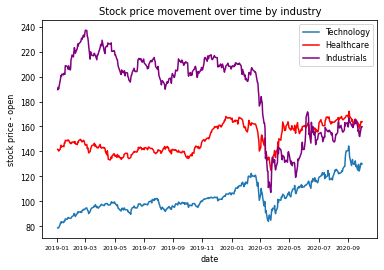

In [145]:
fig = plt.figure()
plt.plot("datetime", "open_x",label ="Technology", data = df_tech_groupby)
plt.plot("datetime", "open_x",label ="Healthcare", color="r",data = df_healthcare_groupby)
plt.plot("datetime", "open_x",label ="Industrials", color="purple", data = df_industrials_groupby)
plt.xlabel('date')
plt.ylabel('stock price - open')
plt.title('Stock price movement over time by industry')
plt.legend()
plt.show()

fig.savefig("stock_prices_industry.png")


In [89]:
covid_df = pd.read_csv(r"C:\Users\veron\DA\da_projekt\world_covid_data.csv",encoding="UTF8")
covid_df.head()

covid_df["datetime"] = covid_df["date"].apply(lambda s: datetime.datetime.strptime(s, "%d/%m/%Y"))

covid_usa = covid_df.loc[covid_df["iso_code"] == "USA"]
covid_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 45092 to 45370
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         279 non-null    object        
 1   continent                        279 non-null    object        
 2   location                         279 non-null    object        
 3   date                             279 non-null    object        
 4   total_cases                      279 non-null    float64       
 5   new_cases                        279 non-null    float64       
 6   new_cases_smoothed               273 non-null    float64       
 7   total_deaths                     279 non-null    float64       
 8   new_deaths                       279 non-null    float64       
 9   new_deaths_smoothed              273 non-null    float64       
 10  total_cases_per_million          279 non-null    float64

In [ ]:
plt.plot("datetime", "open_x",label ="Technology", data = df_tech_groupby)
plt.plot("datetime", "total_cases",label ="Total cases", data = covid_usa)
plt.xlabel('date')
plt.ylabel('stock price - open')
plt.title('Stock price movement over time')
plt.legend()
plt.show()

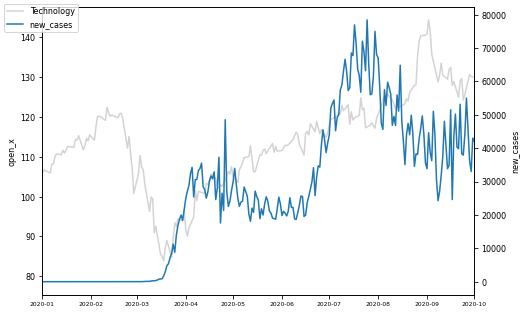

In [142]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
x = covid_df["datetime"]
a1.plot("datetime", "open_x",color="lightgrey", data = df_tech_groupby)
a1.set_ylabel('open_x')
a2 = a1.twinx()
a2.plot("datetime", "new_cases", data = covid_usa)
a2.set_ylabel('new_cases')
fig.legend(labels = ('Technology','new_cases'),loc='upper left')
plt.xlim("2020-01", "2020-10")
plt.show()



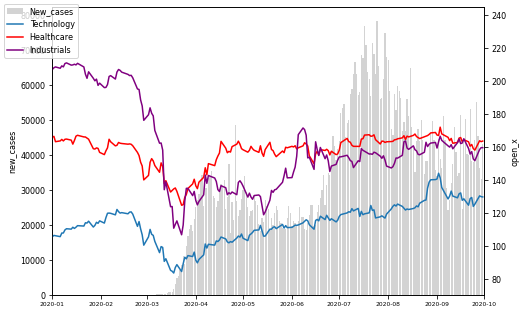

In [148]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
x = covid_df["datetime"]

a1.bar("datetime", "new_cases",color="lightgrey", data = covid_usa)
#a1.plot("datetime", "open_x", data = df_tech_groupby)
a1.set_ylabel('new_cases')
a2 = a1.twinx()
a2.plot("datetime", "open_x", data = df_tech_groupby)
a2.set_ylabel('open_x')
#a3 = a2.twinx()
a2.plot("datetime", "open_x",color="r", data = df_healthcare_groupby)
#a4 = a3.twinx()
a2.plot("datetime", "open_x",color="purple", data = df_industrials_groupby)
fig.legend(labels = ('New_cases','Technology','Healthcare','Industrials'),loc='upper left')
plt.xlim("2020-01", "2020-10")
plt.show()

fig.savefig("covid_industries.png",papertype="letter",bbox_inches="tight")